<a href="https://colab.research.google.com/github/Kshitij879/PnemoniaDetection/blob/main/Pneumonia_Detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2> <b>What is Pneumonia?</b></h2>

<p> <blockquote> Pneumonia is an inflammatory condition of the lung affecting primarily the small air sacs known as alveoli.Symptoms typically include some combination of productive or dry cough, chest pain, fever and difficulty breathing. The severity of the condition is variable. Pneumonia is usually caused by infection with viruses or bacteria and less commonly by other microorganisms, certain medications or conditions such as autoimmune diseases.Risk factors include cystic fibrosis, chronic obstructive pulmonary disease (COPD), asthma, diabetes, heart failure, a history of smoking, a poor ability to cough such as following a stroke and a weak immune system. Diagnosis is often based on symptoms and physical examination. Chest X-ray, blood tests, and culture of the sputum may help confirm the diagnosis.The disease may be classified by where it was acquired, such as community- or hospital-acquired or healthcare-associated pneumonia.</blockquote> </p>



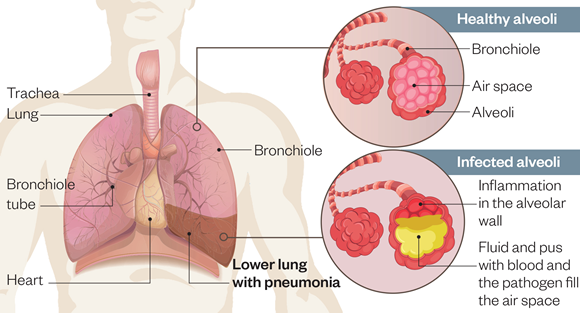

<h2> <b> Bacterial Pneumonia </b></h2>

<p> Pneumonia caused by a bacterium is called bacterial pneumonia. There are many types of bacteria that may cause bacterial pneumonia, but the most common type Streptococcus pneumoniae.
<br>
Common symptoms of bacterial pneumonia include:
<br>
* Chest pain <br>  
* Shortness of breath <br>
* Sputum that is yellow or green mucus while coughing <br>
* Chills <br>
* Fever <br>
* Fatigue <br>
<br>
Bacterial pneumonia requires antibiotics for treatment; ideally, the antibiotic will target the specific type of bacteria. Steroids may also be used to improve breathing.
 </p>
<h2> <b> Viral Pneumonia </b></h2>
<p>Approximately 30% of pneumonia cases are viral. This type of pneumonia typically occurs as a secondary infection from other viruses such as influenza, coronavirus, parainfluenza, adenovirus, and respiratory syncytial virus (RSV).
<br>
These types of viruses spread through air droplets. For example, a sneeze or a cough may cause sputum an air droplet to spread through the air, or the virus could land on a doorknob or a surface that is touched, then brought to the nose or mouth.
<br>
Symptoms of viral pneumonia are similar, although there are differences:
<br>
* A dry cough (note that there is rarely sputum produced with viral pneumonia) <br>
*Fever <br>
*Chills <br>
*Chest pain <br>
*Shortness of breath <br>

While bacterial pneumonia is treated with antibiotics, this treatment will not help bacterial pneumonia. Viruses are not receptive to antibiotics. Occasionally, antiviral medications may be prescribed.
</p>


# Import Libraries

In [6]:
import numpy as np 
import pandas as pd 

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, AvgPool2D, MaxPool2D , Flatten , Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

print(tf.__version__)

2.3.0


# Load Data :

In [8]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_input_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        diag= ""
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                # Reshaping images to preferred size
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) 
                if "bacteria" in img:
                    diag = [1,0,0] 
                elif "virus" in img:
                    diag = [0,1,0] 
                else:
                    diag = [0,0,1]              
                data.append([resized_arr, class_num, diag])
            except Exception as e:
                print(img, e)
    return np.array(data)